# Supplemental Material

Lagged Predictions of Next Week Alcohol Use for Precision Mental Health Support

Kendra Wyant, Gaylen E. Fronk, Jiachen Yu, and John J. Curtin  
October 23, 2024

This file contains the supplemental materials for *Lagged Predictions of Next Week Alcohol Use for Precision Mental Health Support*. It includes a transparency report and all supplemental figures and tables. Additional materials are made available on our study’s OSF page (<https://osf.io/xta67/>).

------------------------------------------------------------------------

In [ ]:

suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(source("https://github.com/jjcurtin/lab_support/blob/main/format_path.R?raw=true"))
suppressPackageStartupMessages(library(tidyposterior))


theme_set(theme_classic())

options(knitr.kable.NA = '')

path_models_lag <- format_path(str_c("studydata/risk/models/lag"))


In [ ]:

pp_tidy <- read_csv(here::here(path_models_lag, "pp_tidy.csv"), 
                                 show_col_types = FALSE) 

ci <- read_csv(here::here(path_models_lag, "test_metrics_all_pp_perf.csv"), 
                                 show_col_types = FALSE) |> 
  mutate(model = factor(model, levels = c("0 lag", "24 lag", "72 lag", "168 lag", "336 lag"),
                        labels = c("0 hours", "24 hours", "72 hours", "168 hours", "336 hours")))

pp_dem <- read_csv(here::here(path_models_lag, "pp_dem_all.csv"), 
                                 show_col_types = FALSE)


## Transparency Report 1.0 (full, 36 items; Aczel et al., 2019)

**Manuscript Title:** Lagged Predictions of Next Week Alcohol Use for Precision Mental Health Support  
**Authors:** Kendra Wyant, Gaylen E. Fronk, Jiachen Yu, and John J. Curtin  
**Corresponding author’s email address:** jjcurtin@wisc.edu  
**Link to Project Repository:** <https://osf.io/xta67/>

### Preregistration Section

-   Prior to analyzing the complete data set, a time-stamped preregistration was posted in an independent, third-party registry for the data analysis plan: Yes

Comments about your Preregistration: We pre-registered our data analytic strategy on OSF.

### Methods Section

The manuscript fully describes…

-   the rationale for the sample size used (e.g., an a priori power analysis): Yes  
-   how participants were recruited: Yes  
-   how participants were selected (e.g., eligibility criteria): Yes  
-   what compensation was offered for participation: Yes  
-   how participant dropout was handled (e.g., replaced, omitted, etc): Yes  
-   how participants were assigned to conditions: N/A. There are no conditions.  
-   how stimulus materials were randomized: N/A.  
-   whether (and, if so, how) participants, experimenters, and data-analysts were kept naive to potentially biasing information: N/A. This is an observations study that does not include analysis of group or manipulations. There were no study conditions to blind.  
-   the study design, procedures, and materials to allow independent replication: Yes  
-   the measures of interest (e.g., friendliness): Yes  
-   all operationalizations for the measures of interest (e.g., a questionnaire measuring friendliness): Yes

### Results and Discussion Section

The manuscript…

-   distinguishes explicitly between “confirmatory” (i.e., prespecified) and “exploratory” (i.e., not prespecified) analyses: All analyses were pre-registered.
-   describes how violations of statistical assumptions were handled: No  
-   justifies all statistical choices (e.g., including or excluding covariates; applying or not applying transformations; use of multi-level models vs. ANOVA): Yes  
-   reports the sample size for each cell of the design: Yes  
-   reports how incomplete or missing data were handled: Yes  
-   presents protocols for data preprocessing (e.g., cleaning, discarding of cases and items, normalizing, smoothing, artifact correction): Yes

### Data, Code, and Materials Availability Section

The following have been made publicly available…

-   the (processed) data, on which the analyses of the manuscript were based: Yes  
-   all code and software (that is not copyright protected): Yes  
-   all instructions, stimuli, and test materials (that are not copyright protected): Yes  
-   Are the data properly archived (i.e., would a graduate student with relevant background knowledge be able to identify each variable and reproduce the analysis): Yes  
-   The manuscript includes a statement concerning the availability and location of all research items, including data, materials, and code relevant to the study: Yes

## Supplemental Figures

### Figure S1: Full Posterior Distributions for auROC by Model

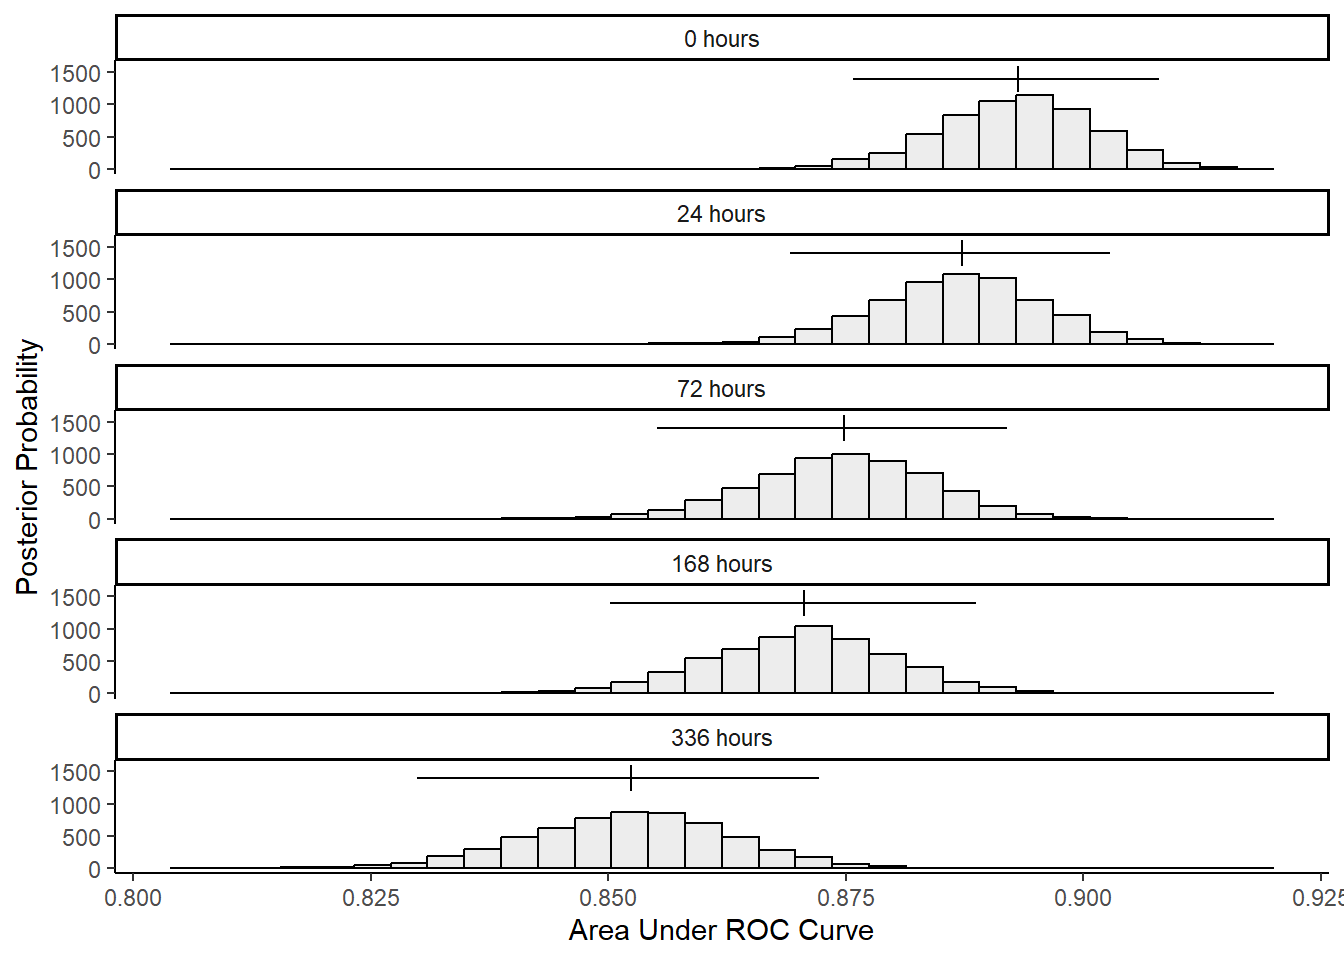

In [ ]:
pp_tidy |> 
  mutate(model = factor(model, levels = c("lag0", "lag24", "lag72", "lag168", "lag336"),
                        labels = c("0 hours", "24 hours", "72 hours", "168 hours", "336 hours"))) |>
  ggplot() + 
  geom_histogram(aes(x = posterior), fill = "light grey", color = "black", alpha = .4, 
                 bins = 30) +
  geom_segment(mapping = aes(y = 1200, yend = 1600, x = pp_median, xend = pp_median),
               data = ci) +
  geom_segment(mapping = aes(y = 1400, yend = 1400, x = pp_lower, xend = pp_upper),
                data = ci) +
  facet_wrap(~model, ncol = 1) +
  scale_y_continuous("Posterior Probability", breaks = c(0, 500, 1000, 1500)) +
  xlab("Area Under ROC Curve") +
  theme_classic() +
  theme(legend.position = "none")


### Figure S2: Global Shapley Plot

## Figure 3: Shapley values

**Move to supplement?**

Read in data

In [ ]:
global_all <- read_rds(here::here(path_models_lag, "shap_global_all.rds")) |> 
   filter(!variable_grp %in% c("day of week (other)", "time of day (other)")) |> 
  mutate(variable_grp = str_remove(variable_grp, "(EMA item)"),
          variable_grp = str_remove(variable_grp, "(demographic)"),
          variable_grp = str_remove(variable_grp, "(other)"),
        variable_grp = str_remove(variable_grp, "[[:punct:]][[:punct:]]")) |> 
   mutate(variable_grp = reorder(variable_grp, mean_value, sum),
          model = factor(model, c("0 lag", "24 lag", "72 lag", "168 lag", "336 lag")))

shap_levels <- global_all |>
  mutate(variable_grp = reorder(variable_grp, mean_value, sum)) |>
  pull(variable_grp) |>
  levels()


Global shapley pannel

In [ ]:
color_codes <- c("#240e31","#75f3d3", "#458892", "#751c6d", "#cb6bce")

panel_shap_global <- global_all |>
   mutate(model = factor(model, levels = c("336 lag", "168 lag", "72 lag", "24 lag", "0 lag" ),
                         labels = c("336 hours", "168 hours", "72 hours", "24 hours", "0 hours" ))) |> 
  ggplot() +
  geom_bar(aes(x = variable_grp, y = mean_value, fill = model), stat = "identity") +
  ylab("Mean(|Shapley Value|)") +
  xlab("") +
  labs(fill = "Model Lag") +
  scale_color_manual(values = color_codes) +
  scale_fill_manual(values = color_codes) +
  theme(axis.text=element_text(size=9.5),
        panel.border = element_rect(colour = "black", fill = NA, linewidth = 1),
        legend.position = "right",
        # legend.key.size = unit(.3, 'cm'),
        ) +
  coord_flip()


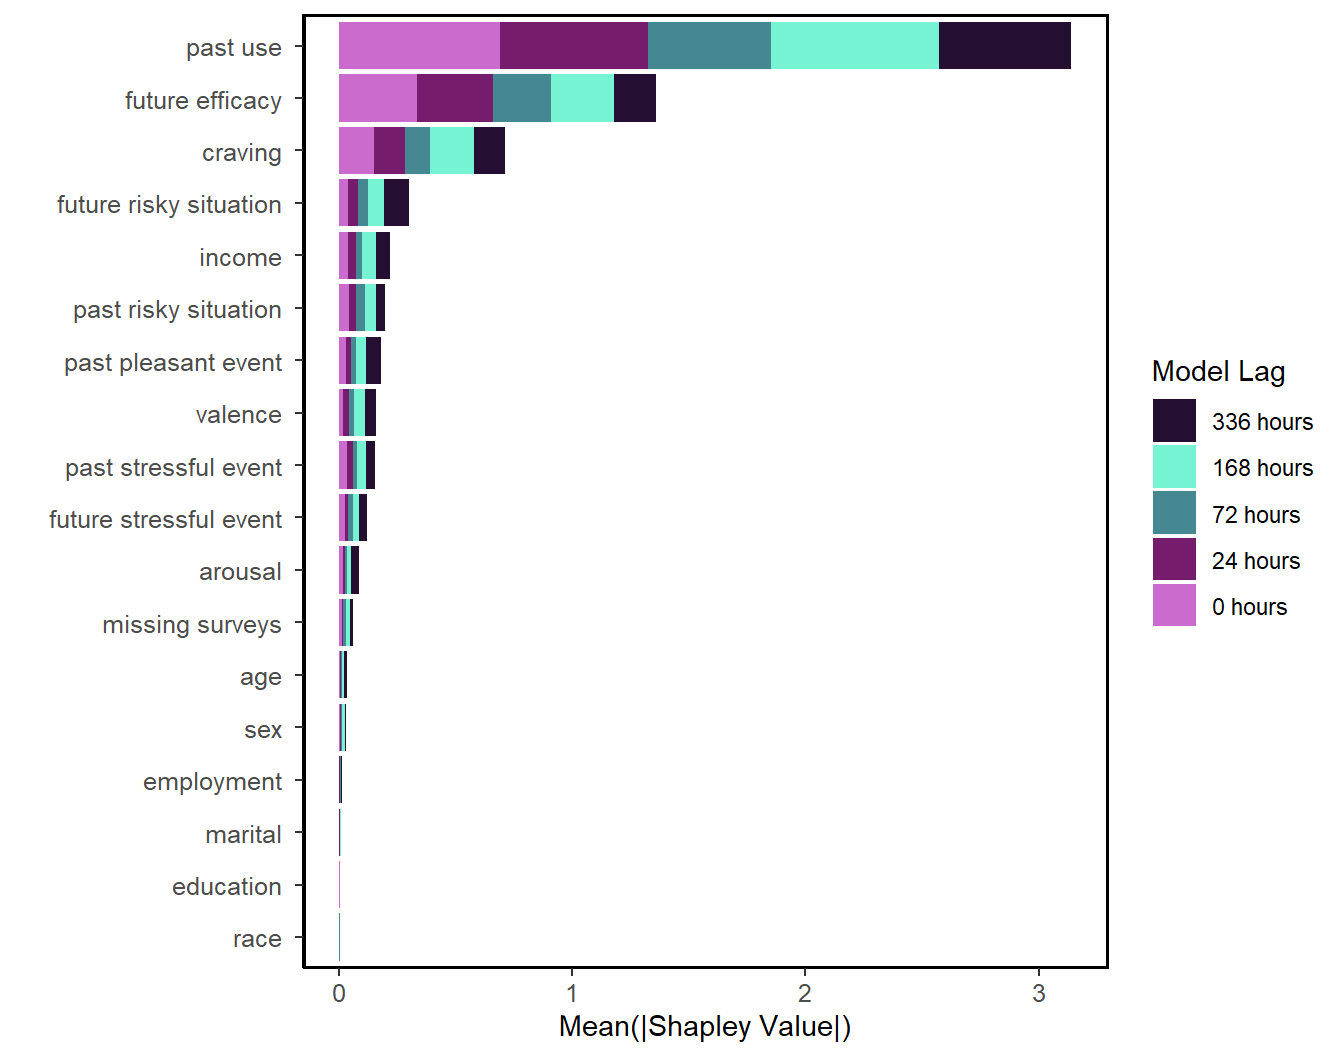

In [ ]:

panel_shap_global


### Figure S3: Local Shapley Plots by Model

In [ ]:

shap_feat_0 <- read_rds(here::here(path_models_lag, "outer_shapsgrp_with_features_downsized_1week_0_v1_nested_main.rds")) |> 
  mutate(variable_grp = factor(variable_grp, levels = shap_levels),
         feature_score_z_mean = if_else(variable_grp == "future efficacy ",
                                        feature_score_z_mean * (-1),
                                        feature_score_z_mean))
  
shap_feat_24 <- read_rds(here::here(path_models_lag, "outer_shapsgrp_with_features_downsized_1week_24_v1_nested_main.rds")) |> 
  mutate(variable_grp = factor(variable_grp, levels = shap_levels),
         feature_score_z_mean = if_else(variable_grp == "future efficacy ",
                                        feature_score_z_mean * -1,
                                        feature_score_z_mean))

shap_feat_72 <- read_rds(here::here(path_models_lag, "outer_shapsgrp_with_features_downsized_1week_72_v1_nested_main.rds")) |> 
  mutate(variable_grp = factor(variable_grp, levels = shap_levels),
         feature_score_z_mean = if_else(variable_grp == "future efficacy ",
                                        feature_score_z_mean * -1,
                                        feature_score_z_mean))
shap_feat_168 <- read_rds(here::here(path_models_lag, "outer_shapsgrp_with_features_downsized_1week_168_v1_nested_main.rds")) |> 
  mutate(variable_grp = factor(variable_grp, levels = shap_levels),
         feature_score_z_mean = if_else(variable_grp == "future efficacy ",
                                        feature_score_z_mean * -1,
                                        feature_score_z_mean))

shap_feat_336 <- read_rds(here::here(path_models_lag, "outer_shapsgrp_with_features_downsized_1week_336_v1_nested_main.rds")) |> 
  mutate(variable_grp = factor(variable_grp, levels = shap_levels),
         feature_score_z_mean = if_else(variable_grp == "future efficacy ",
                                        feature_score_z_mean * -1,
                                        feature_score_z_mean))


In [ ]:

panel_shap_local_0 <- shap_feat_0 |>
  filter(!is.na(variable_grp)) |> 
  # scale feat score to 0-1
  mutate(feature_score = (feature_score_z_mean - min(feature_score_z_mean))/(max(feature_score_z_mean)-min(feature_score_z_mean))) |> 
  ggplot(mapping = aes(x = variable_grp, y = value, color = feature_score)) +
  ggforce::geom_sina(method = "counts", maxwidth = .7, alpha = .4) +
  geom_hline(yintercept = 0) +
  scale_y_continuous(limits = c(-2, 5), breaks = seq(-2, 5)) +
  ylab("Shapley Value (0 Hour Lag)") +
  xlab(NULL) +
  scale_color_gradientn(colors = c("#240e31", "#cb6bce"),
                        breaks = c(.1, .9),
                        labels = c("low", "high")) +
  labs(color = NULL) +
  theme(legend.position = "right",
        legend.key.size = unit(0.25, "cm"),
        axis.text=element_text(size=9.5),
        panel.border = element_rect(colour = "black", fill = NA, linewidth = 1))+
  coord_flip()

panel_shap_local_24 <- shap_feat_24 |>
  filter(!is.na(variable_grp)) |> 
  # scale feat score to 0-1
  mutate(feature_score = (feature_score_z_mean - min(feature_score_z_mean))/(max(feature_score_z_mean)-min(feature_score_z_mean))) |> 
  ggplot(mapping = aes(x = variable_grp, y = value, color = feature_score)) +
  ggforce::geom_sina(method = "counts", maxwidth = .7, alpha = .4) +
  geom_hline(yintercept = 0) +
  scale_y_continuous(limits = c(-2, 5), breaks = seq(-2, 5)) +
  ylab("Shapley Value (24 Hour Lag)") +
  xlab(NULL) +
  scale_color_gradientn(colors = c("#240e31", "#922488"),
                        breaks = c(.1, .9),
                        labels = c("low", "high")) +
  labs(color = NULL) +
  theme(legend.position = "right",
        legend.key.size = unit(0.25, "cm"),
        axis.text=element_text(size=9.5),
        panel.border = element_rect(colour = "black", fill = NA, linewidth = 1))+
  coord_flip()

panel_shap_local_72 <- shap_feat_72 |>
  filter(!is.na(variable_grp)) |> 
  # scale feat score to 0-1
  mutate(feature_score = (feature_score_z_mean - min(feature_score_z_mean))/(max(feature_score_z_mean)-min(feature_score_z_mean))) |> 
  ggplot(mapping = aes(x = variable_grp, y = value, color = feature_score)) +
  ggforce::geom_sina(method = "counts", maxwidth = .7, alpha = .4) +
  geom_hline(yintercept = 0) +
  scale_y_continuous(limits = c(-2, 5), breaks = seq(-2, 5)) +
  ylab("Shapley Value (72 Hour Lag)") +
  xlab(NULL) +
  scale_color_gradientn(colors = c("#240e31", "#458892"),
                        breaks = c(.1, .9),
                        labels = c("low", "high")) +
  labs(color = NULL) +
  theme(legend.position = "right",
        legend.key.size = unit(0.25, "cm"),
        axis.text=element_text(size=9.5),
        panel.border = element_rect(colour = "black", fill = NA, linewidth = 1))+
  coord_flip()

panel_shap_local_168 <- shap_feat_168 |>
  filter(!is.na(variable_grp)) |> 
  # scale feat score to 0-1
  mutate(feature_score = (feature_score_z_mean - min(feature_score_z_mean))/(max(feature_score_z_mean)-min(feature_score_z_mean))) |> 
  ggplot(mapping = aes(x = variable_grp, y = value, color = feature_score)) +
  ggforce::geom_sina(method = "counts", maxwidth = .7, alpha = .4) +
  geom_hline(yintercept = 0) +
  scale_y_continuous(limits = c(-2, 5), breaks = seq(-2, 5)) +
  ylab("Shapley Value (168 Hour Lag)") +
  xlab(NULL) +
  scale_color_gradientn(colors = c("#240e31", "#75f3d3"),
                        breaks = c(.1, .9),
                        labels = c("low", "high")) +
  labs(color = NULL) +
  theme(legend.position = "right",
        legend.key.size = unit(0.25, "cm"),
        axis.text=element_text(size=9.5),
        panel.border = element_rect(colour = "black", fill = NA, linewidth = 1))+
  coord_flip()


panel_shap_local_336 <- shap_feat_336 |>
  filter(!is.na(variable_grp)) |> 
  # scale feat score to 0-1
  mutate(feature_score = (feature_score_z_mean - min(feature_score_z_mean))/(max(feature_score_z_mean)-min(feature_score_z_mean))) |> 
  ggplot(mapping = aes(x = variable_grp, y = value, color = feature_score)) +
  ggforce::geom_sina(method = "counts", maxwidth = .7, alpha = .4) +
  geom_hline(yintercept = 0) +
  scale_y_continuous(limits = c(-2, 5), breaks = seq(-2, 5)) +
  ylab("Shapley Value (336 Hour Lag)") +
  xlab(NULL) +
  scale_color_gradientn(colors = c("#240e31", "#f9e79f"),
                        breaks = c(.1, .9),
                        labels = c("low", "high")) +
  labs(color = NULL) +
  theme(legend.position = "right",
        legend.key.size = unit(0.25, "cm"),
        axis.text=element_text(size=9.5),
        panel.border = element_rect(colour = "black", fill = NA, linewidth = 1))+
  coord_flip()


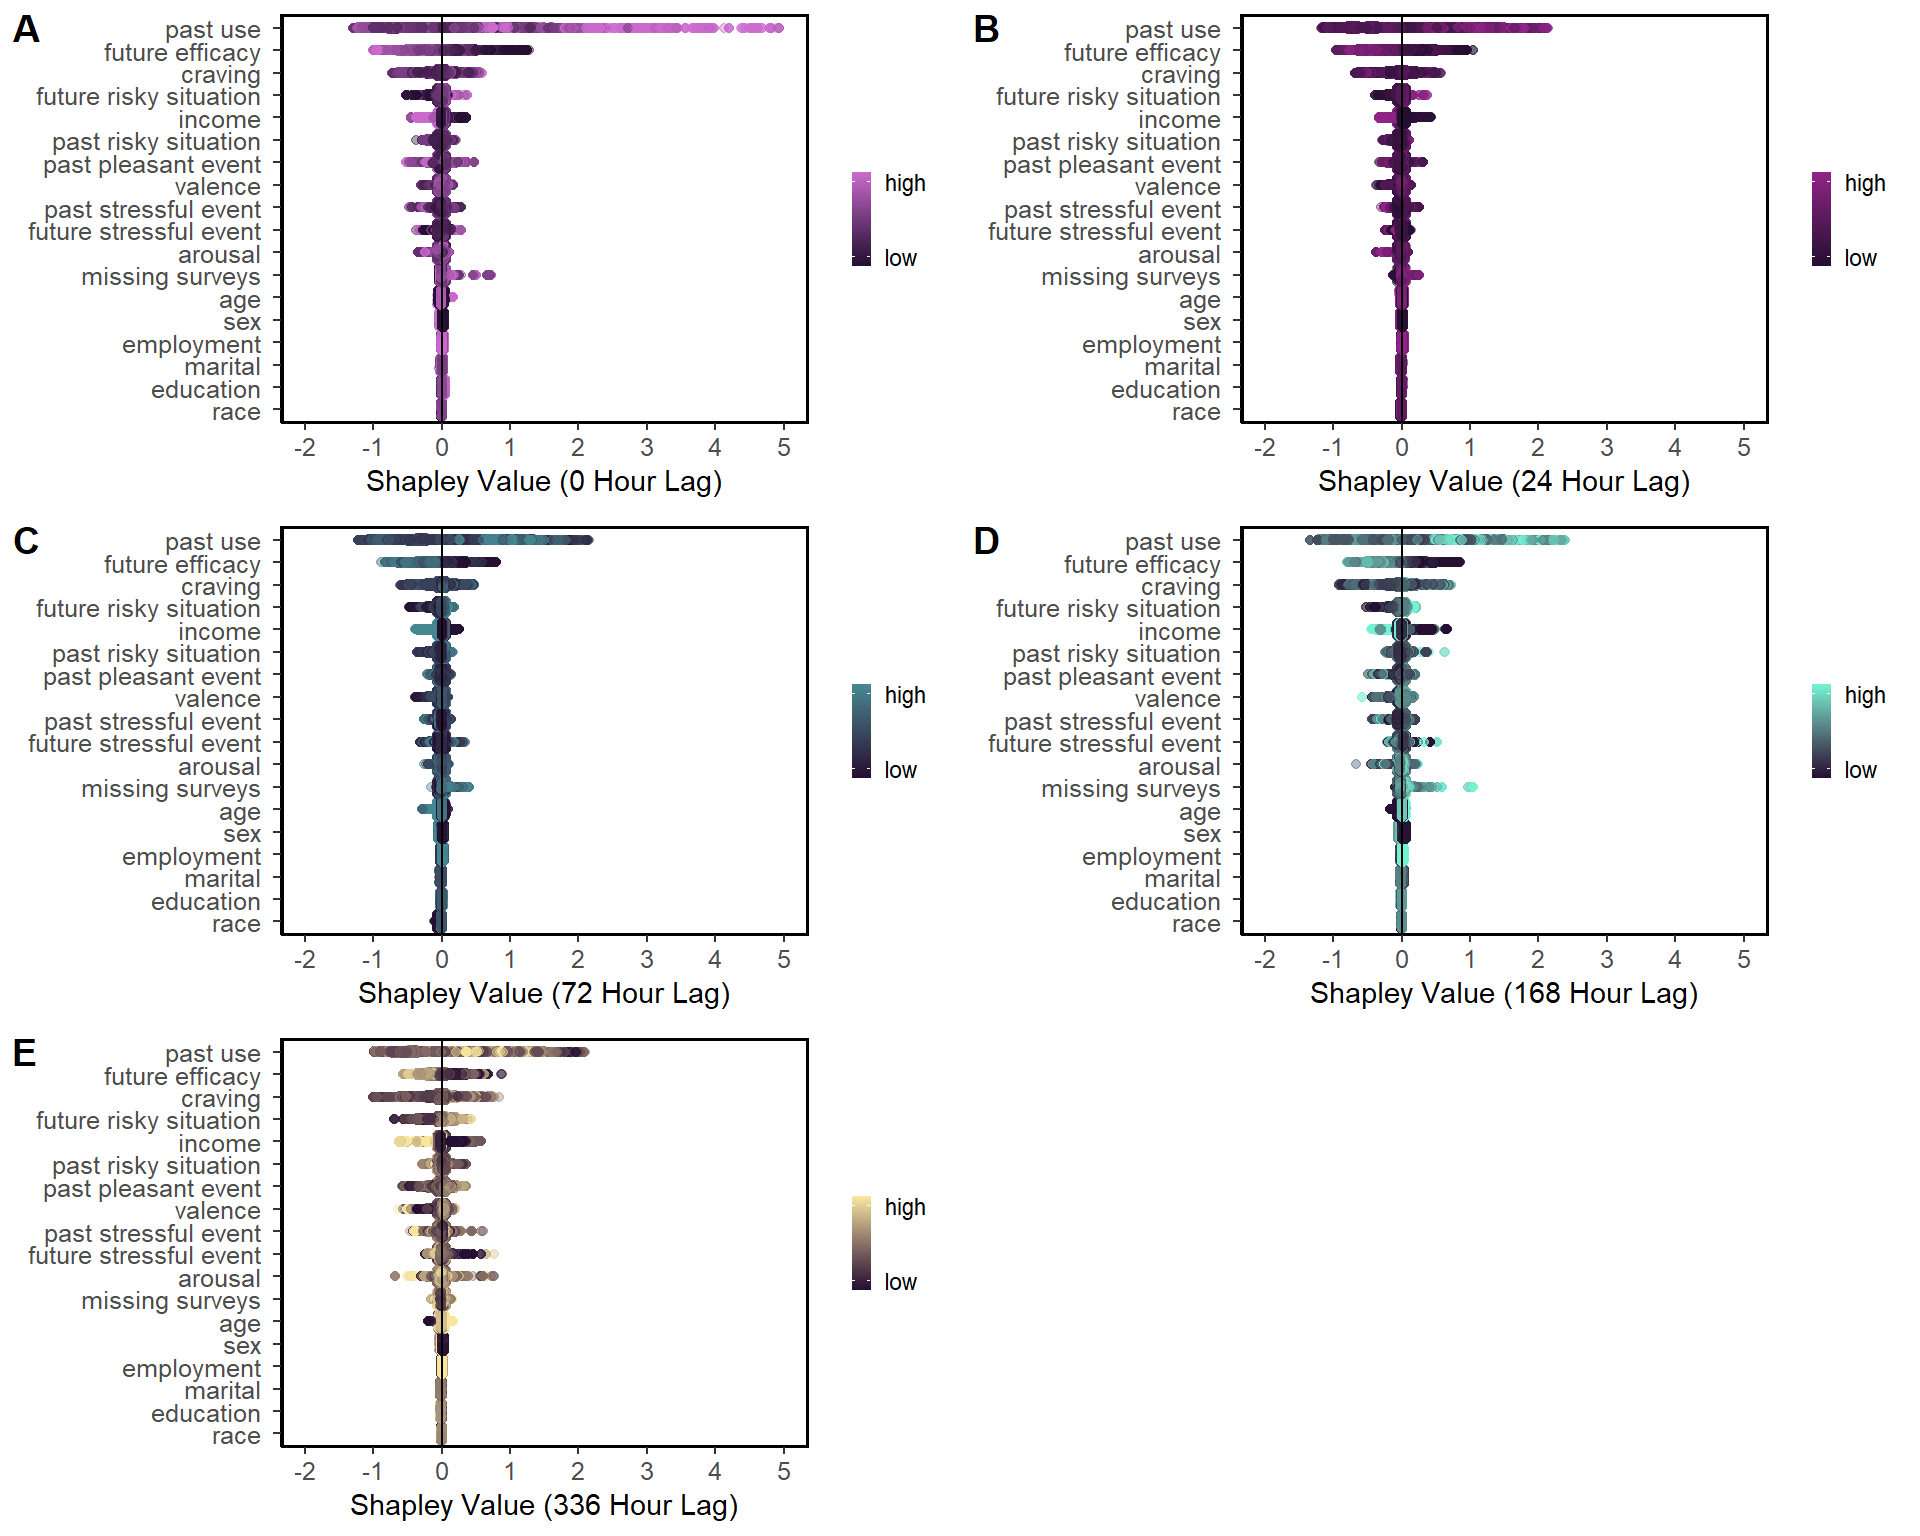

In [ ]:

cowplot::plot_grid(panel_shap_local_0,
                   panel_shap_local_24,
                   panel_shap_local_72, 
                   panel_shap_local_168,
                   panel_shap_local_336, 
                   ncol = 2, labels = c("A", "B", "C", "D", "E"), 
                   align = "hv")


### Figure S4: Individual Shapley Plots for Top Features

In [ ]:

shap_feat_all <- shap_feat_0 |> 
  mutate(model = "0 hours") |> 
  rbind(shap_feat_24 |> 
  mutate(model = "24 hours")) |> 
  rbind(shap_feat_72 |> 
  mutate(model = "72 hours")) |> 
  rbind(shap_feat_168 |> 
  mutate(model = "168 hours")) |> 
  rbind(shap_feat_336 |> 
  mutate(model = "336 hours")) |> 
  mutate(model = factor(model, levels = c("0 hours", "24 hours", "72 hours",
                                          "168 hours", "336 hours")))


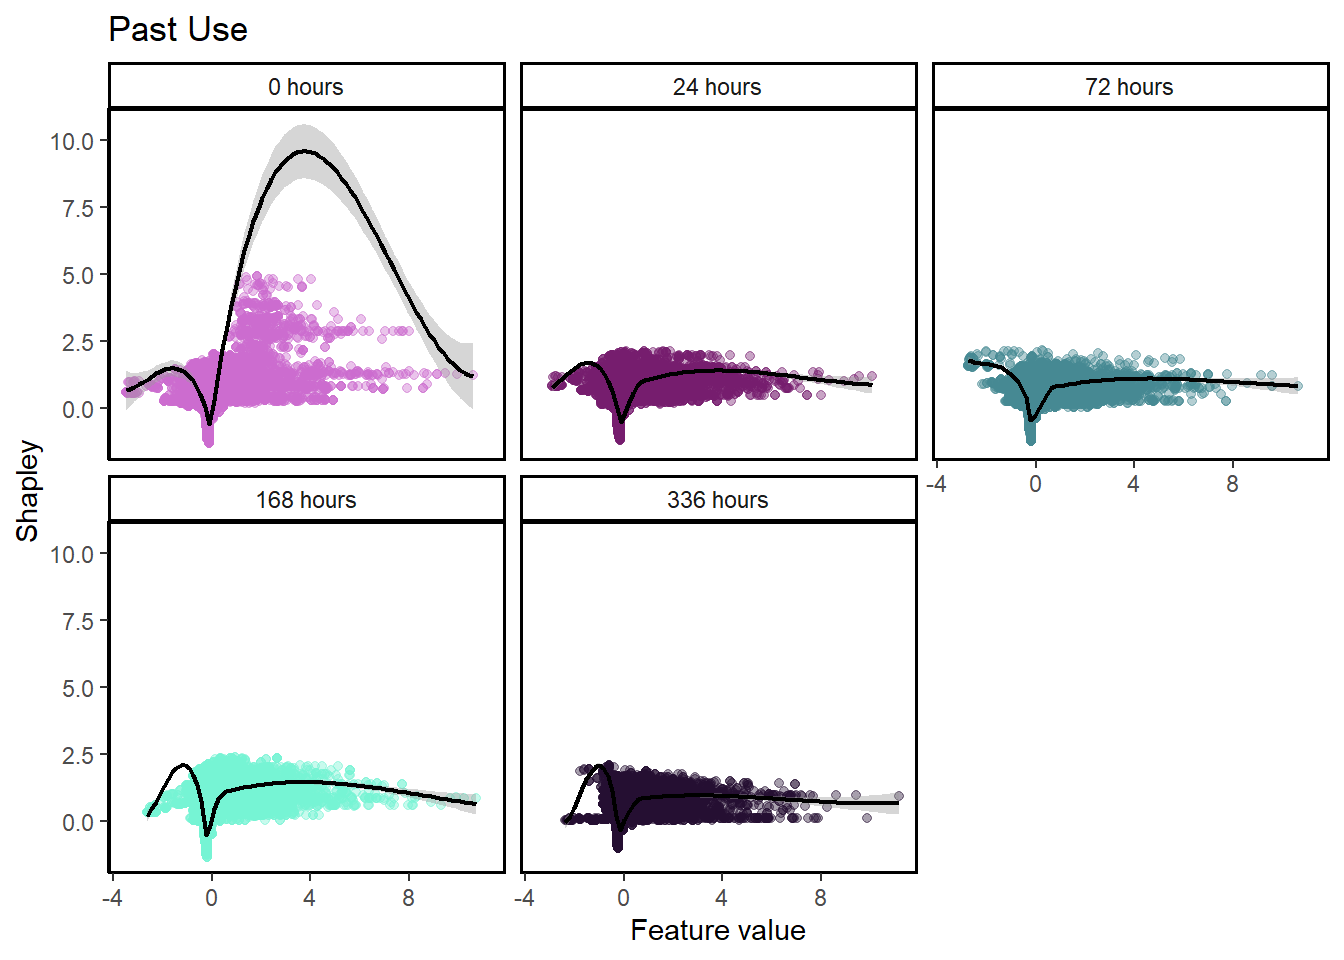

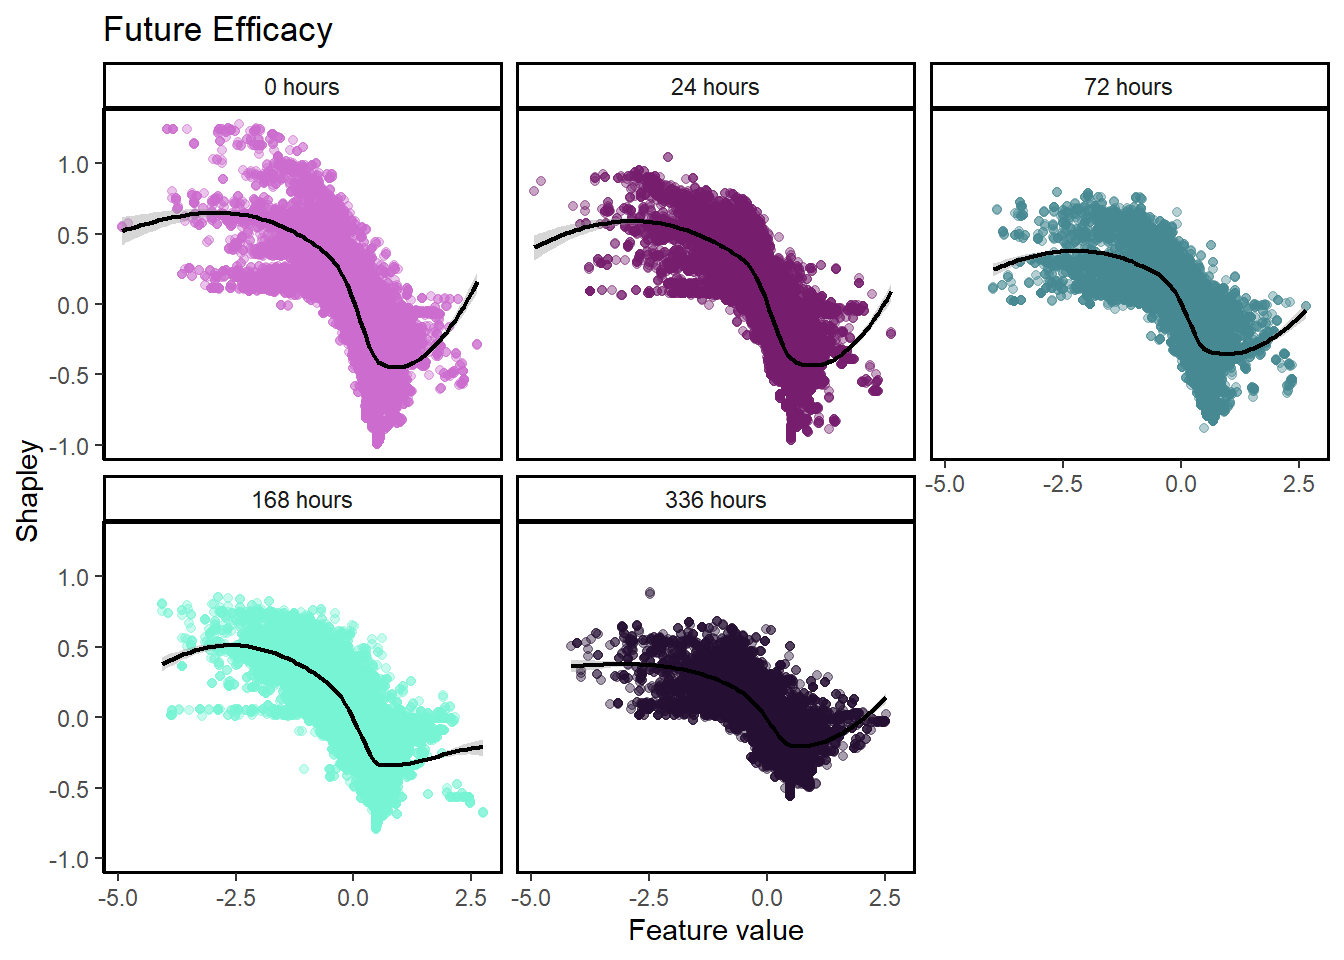

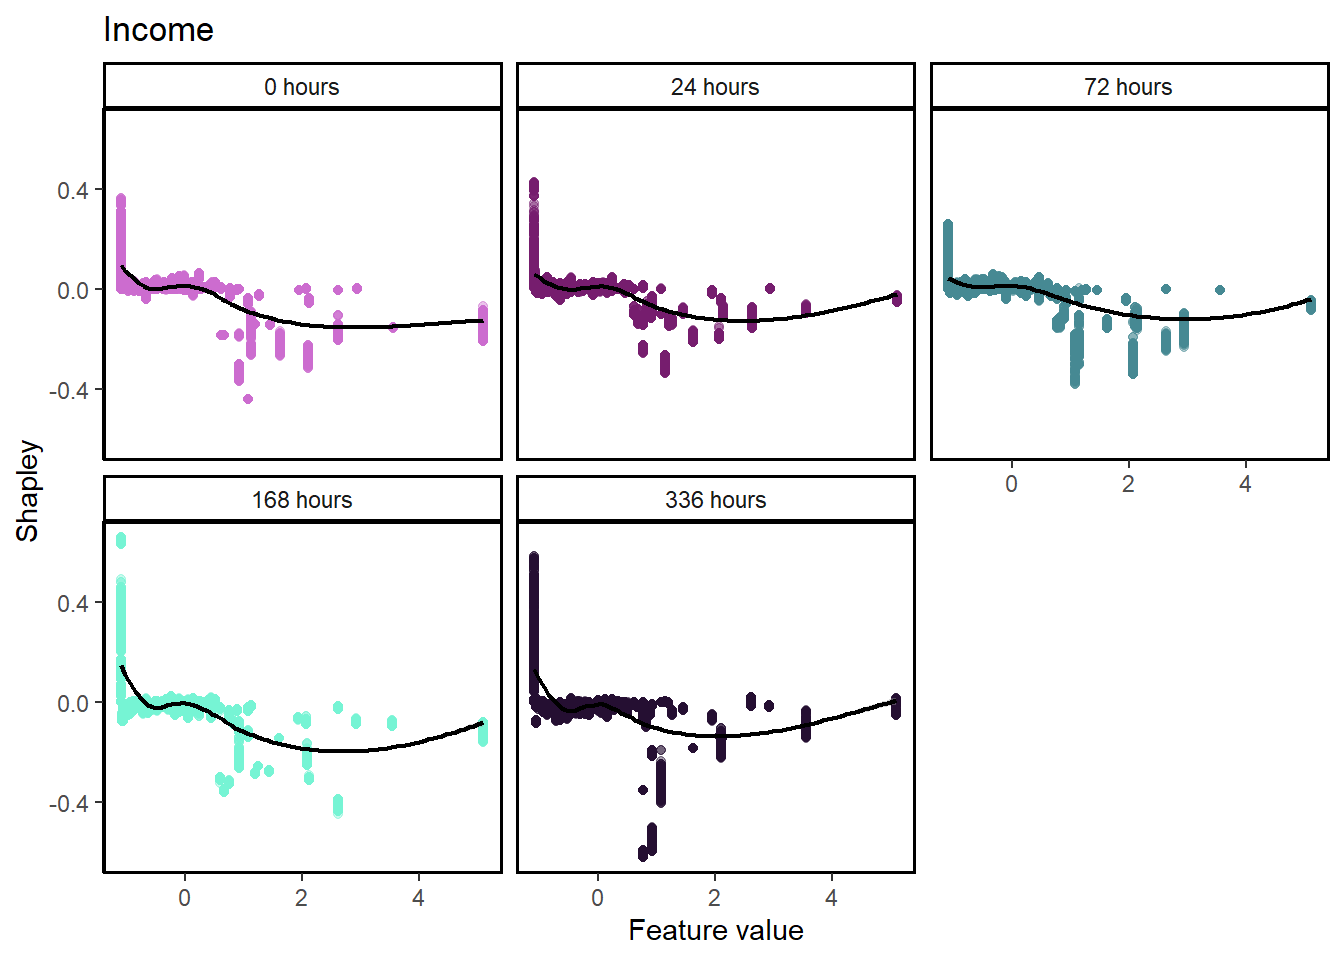

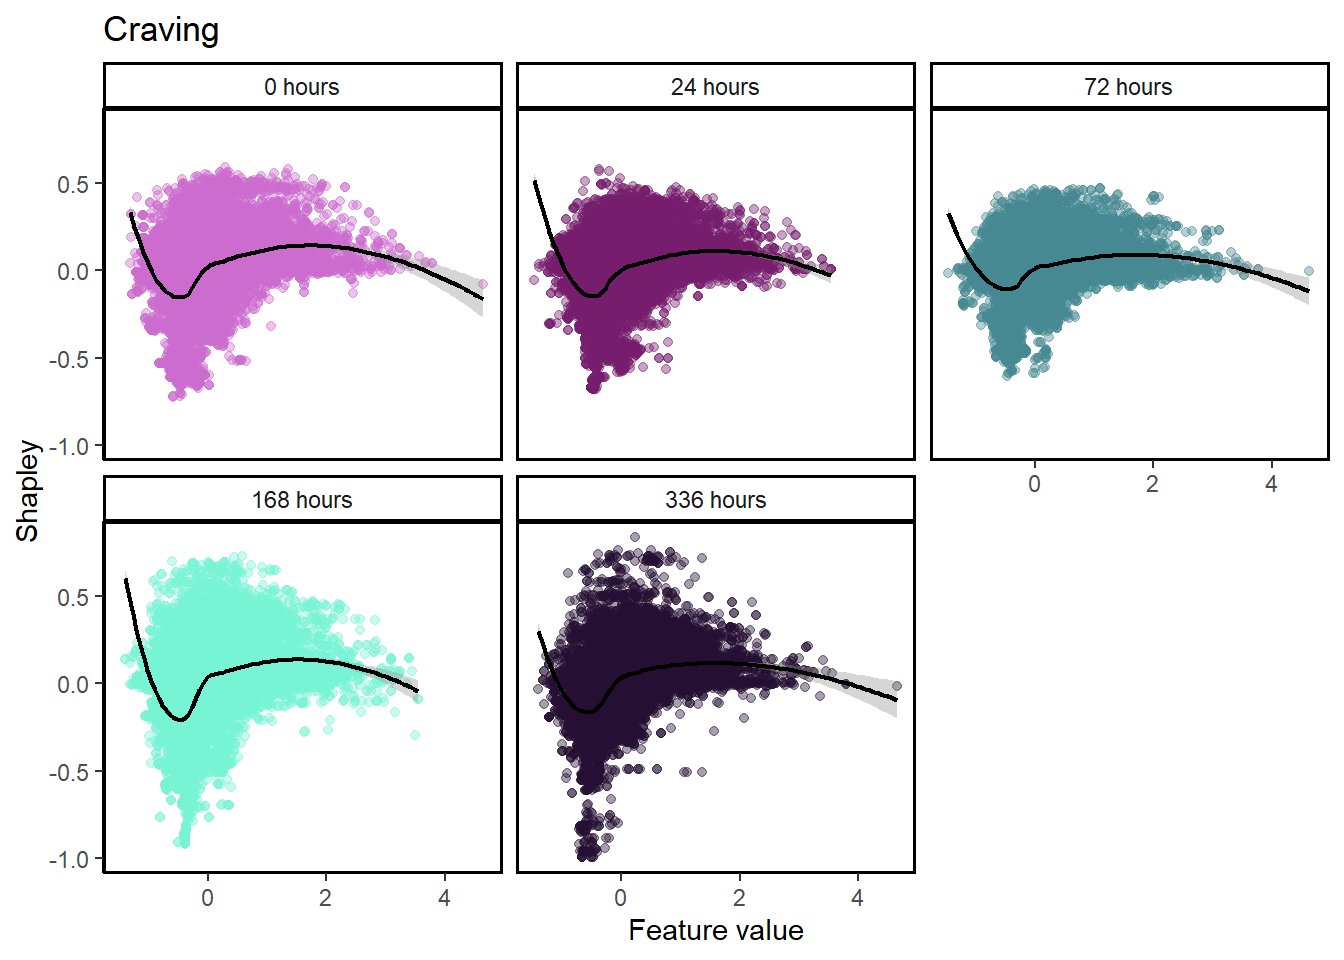

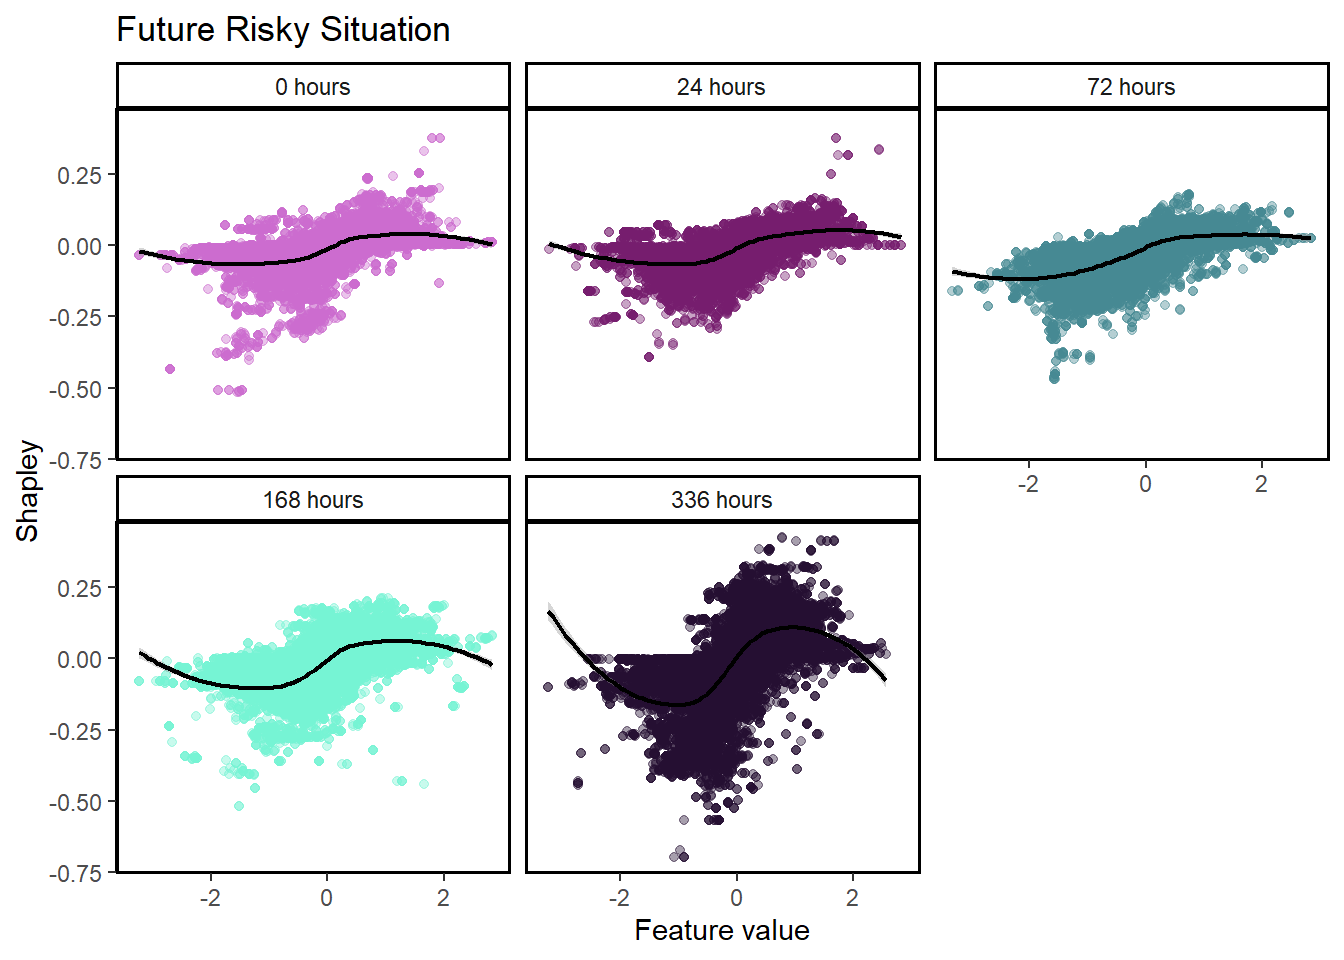

In [ ]:

color_codes <- c("#cb6bce", "#751c6d", "#458892", "#75f3d3", "#240e31")

shap_feat_all |> 
  filter(variable_grp == "past use ") |> 
  ggplot(aes(x = feature_score_z_mean, y = value, color = model)) +
  geom_point(alpha = .4) +
  geom_smooth(formula = y ~ x, 
              method = "loess", color = "black", linewidth = .75) +
  facet_wrap(~model) +
  scale_color_manual(values = color_codes) +
  labs(title = "Past Use", y = "Shapley", x = "Feature value") +
  theme(legend.position = "none",
        panel.border = element_rect(colour = "black", fill = NA, linewidth = 1))


## Supplemental Tables

### Table S1: Global Shapley Scores by Model

In [ ]:
global_all |> 
  arrange(model, desc(mean_value)) |> 
  knitr::kable()


  model     variable_grp               mean_value
  --------- ------------------------ ------------
  0 lag     past use                    0.6915530
  0 lag     future efficacy             0.3354062
  0 lag     craving                     0.1492141
  0 lag     past risky situation        0.0409319
  0 lag     future risky situation      0.0396250
  0 lag     income                      0.0386680
  0 lag     past stressful event        0.0347977
  0 lag     past pleasant event         0.0303134
  0 lag     future stressful event      0.0235291
  0 lag     valence                     0.0180646
  0 lag     arousal                     0.0153398
  0 lag     missing surveys             0.0104797
  0 lag     age                         0.0056648
  0 lag     sex                         0.0036376
  0 lag     employment                  0.0020814
  0 lag     education                   0.0015701
  0 lag     marital                     0.0012997
  0 lag     race                        0.0003310
  24 lag    past use                    0.6353110
  24 lag    future efficacy             0.3225067
  24 lag    craving                     0.1349103
  24 lag    future risky situation      0.0422645
  24 lag    past risky situation        0.0316897
  24 lag    income                      0.0314424
  24 lag    past stressful event        0.0228529
  24 lag    valence                     0.0221616
  24 lag    past pleasant event         0.0215528
  24 lag    future stressful event      0.0151652
  24 lag    arousal                     0.0092257
  24 lag    missing surveys             0.0042630
  24 lag    sex                         0.0035956
  24 lag    age                         0.0026348
  24 lag    employment                  0.0023221
  24 lag    marital                     0.0010465
  24 lag    education                   0.0005360
  24 lag    race                        0.0003213
  72 lag    past use                    0.5259043
  72 lag    future efficacy             0.2500811
  72 lag    craving                     0.1072869
  72 lag    future risky situation      0.0430571
  72 lag    past risky situation        0.0391228
  72 lag    income                      0.0284529
  72 lag    valence                     0.0242838
  72 lag    past pleasant event         0.0205197
  72 lag    future stressful event      0.0199576
  72 lag    past stressful event        0.0190108
  72 lag    missing surveys             0.0164443
  72 lag    arousal                     0.0087430
  72 lag    sex                         0.0059852
  72 lag    age                         0.0048634
  72 lag    employment                  0.0029590
  72 lag    marital                     0.0020081
  72 lag    education                   0.0008448
  72 lag    race                        0.0008334
  168 lag   past use                    0.7202721
  168 lag   future efficacy             0.2708614
  168 lag   craving                     0.1853099
  168 lag   future risky situation      0.0673724
  168 lag   income                      0.0615443
  168 lag   valence                     0.0472200
  168 lag   past risky situation        0.0456872
  168 lag   past pleasant event         0.0422742
  168 lag   past stressful event        0.0396944
  168 lag   future stressful event      0.0268345
  168 lag   missing surveys             0.0172899
  168 lag   arousal                     0.0160417
  168 lag   sex                         0.0109266
  168 lag   age                         0.0060001
  168 lag   employment                  0.0032052
  168 lag   marital                     0.0027324
  168 lag   education                   0.0004615
  168 lag   race                        0.0003573
  336 lag   past use                    0.5669742
  336 lag   future efficacy             0.1799614
  336 lag   craving                     0.1343185
  336 lag   future risky situation      0.1078876
  336 lag   past pleasant event         0.0653338
  336 lag   income                      0.0564261
  336 lag   valence                     0.0451530
  336 lag   past risky situation        0.0398233
  336 lag   past stressful event        0.0366207
  336 lag   arousal                     0.0355294
  336 lag   future stressful event      0.0319974
  336 lag   age                         0.0143800
  336 lag   missing surveys             0.0097757
  336 lag   sex                         0.0052177
  336 lag   employment                  0.0024394
  336 lag   marital                     0.0015635
  336 lag   education                   0.0015587
  336 lag   race                        0.0001792


### Table S2: Model performance by Demographic Group

In [ ]:

pp_dem <- pp_dem |> 
  mutate(lag = factor(lag, levels = c(0, 24, 72, 168, 336), 
                        labels = c("0 hours", "24 hours", "72 hours", "168 hours", "336 hours" )),
         model = factor(model, levels = c("not white", "non-hispanic white",
                                        "female", "male",
                                        "below poverty", "above poverty"))) |> 
  arrange(model, lag)

pp_dem_all <- pp_dem |> 
  filter(lag == "0 hours") |> 
  mutate(pp_lower = round(pp_lower, 3),
         pp_upper = round(pp_upper, 3),
         ci = str_c(pp_lower,"-",pp_upper)) |>
  select(-c(lag, pp_lower, pp_upper)) |> 
  bind_cols(pp_dem |> 
  filter(lag == "24 hours") |> 
  mutate(pp_lower = round(pp_lower, 3),
         pp_upper = round(pp_upper, 3),
         ci = str_c(pp_lower,"-",pp_upper)) |>
  select(-c(lag, pp_lower, pp_upper, model))) |> 
  bind_cols(pp_dem |> 
  filter(lag == "72 hours") |> 
  mutate(pp_lower = round(pp_lower, 3),
         pp_upper = round(pp_upper, 3),
         ci = str_c(pp_lower,"-",pp_upper)) |>
  select(-c(lag, pp_lower, pp_upper, model))) |> 
  bind_cols(pp_dem |> 
  filter(lag == "168 hours") |> 
  mutate(pp_lower = round(pp_lower, 3),
         pp_upper = round(pp_upper, 3),
         ci = str_c(pp_lower,"-",pp_upper)) |>
  select(-c(lag, pp_lower, pp_upper, model))) |> 
  bind_cols(pp_dem |> 
  filter(lag == "336 hours") |> 
  mutate(pp_lower = round(pp_lower, 3),
         pp_upper = round(pp_upper, 3),
         ci = str_c(pp_lower,"-",pp_upper)) |>
  select(-c(lag, pp_lower, pp_upper, model))) |> 
  add_row(model = "Race/Ethnicity", .before = 1) |> 
  add_row(model = "Sex at Birth", .before = 4) |> 
  add_row(model = "Income", .before = 7) |> 
  suppressMessages()


In [ ]:

pp_dem_all |> 
  mutate(across(c(pp_median...2, pp_median...4, pp_median...6, pp_median...8, pp_median...10), 
                ~round(., 3)),
         across(where(is.numeric), as.character)) |> 
  add_row(model = "Group",
          pp_median...2 = "Median auROC",
          ci...3 = "Bayesian CI",
          pp_median...4 = "Median auROC",
          ci...5 = "Bayesian CI",
          pp_median...6 = "Median auROC",
          ci...7 = "Bayesian CI",
          pp_median...8 = "Median auROC",
          ci...9 = "Bayesian CI",
          pp_median...10 = "Median auROC",
          ci...11 = "Bayesian CI",
          .before = 1) |> 
  knitr::kable(col.names = c("", "0 Lag", "",
                    "24 Lag", "", 
                   "72 Lag", "",
                    "168 Lag", "",
                   "336 Lag", "")) 


  -----------------------------------------------------------------------------------------------------------------------------------
                   0 Lag                  24 Lag                 72 Lag                 168 Lag                336 Lag  
  ---------------- -------- ------------- -------- ------------- -------- ------------- -------- ------------- -------- -------------
  Group            Median   Bayesian CI   Median   Bayesian CI   Median   Bayesian CI   Median   Bayesian CI   Median   Bayesian CI
                   auROC                  auROC                  auROC                  auROC                  auROC    

  Race/Ethnicity                                                                                                        

  not white        0.736    0.622-0.822   0.713    0.58-0.815    0.727    0.644-0.792   0.733    0.668-0.786   0.749    0.691-0.802

  non-hispanic     0.905    0.857-0.938   0.894    0.829-0.938   0.886    0.843-0.918   0.881    0.847-0.908   0.857    0.819-0.888
  white                                                                                                                 

  Sex at Birth                                                                                                          

  female           0.867    0.847-0.885   0.849    0.827-0.869   0.836    0.813-0.856   0.823    0.801-0.845   0.788    0.76-0.815

  male             0.926    0.914-0.936   0.921    0.908-0.932   0.916    0.903-0.927   0.92     0.907-0.93    0.905    0.89-0.918

  Income                                                                                                                

  below poverty    0.812    0.757-0.856   0.805    0.759-0.843   0.792    0.744-0.834   0.749    0.7-0.794     0.729    0.68-0.77

  above poverty    0.903    0.874-0.926   0.892    0.864-0.913   0.884    0.856-0.908   0.882    0.856-0.904   0.86     0.831-0.884
  -----------------------------------------------------------------------------------------------------------------------------------
